In [1]:
import json
import pandas as pd
import numpy as np

If you want to open a file in your directory, you can use an f-string (see below) instead of having to type out the whole directory every time. If you move your files, you only need to update the `file_dir` variable.

In [2]:
file_dir = "/Users/joshuaallen/Documents/Boot_Camp/UCB_Projects/Movies-ETL/"

Most data you'll work with in real life won't come to you in a flat format. One great thing about the JSON format is it's really flexible, and it can handle raw, messy data. But if you try to read raw, messy JSON data directly into a DataFrame, the DataFrame will be a mess too. It's very difficult to find and fix corrupted data in messy DataFrames, and it's also difficult to consolidate columns without headaches.

### Load the JSON into a List of Dictionaries

Using the `with` statement, open the Wikipedia JSON file to be read into the variable `file`, and use `json.load()` to save the data to a new variable.

In [3]:
with open(f'{file_dir}wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
len(wiki_movies_raw)

7311

### Inspect the data
Also, we should always take a look at a few individual records just to make sure that the data didn't come in horribly garbled. With a DataFrame, we'd do this with the `head()` and `tail()` methods, but with a list of dicts, we need to inspect the records directly.

Remember, since we're working with a list, we'll use index slices to select specific chunks of `wiki_movies_raw` to inspect directly. This is also a great use case for negative index slices.

In [5]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [6]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

## Extract the Kaggle Data

Since the Kaggle data is already in flat-file formats, we'll just pull them into Pandas DataFrames directly with the following code.

In [8]:
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

Inspect the two DataFrames using the `head()`, `tail()`, and `sample()` methods to make sure that everything seems to be loaded in correctly. (We'll do a deeper dive in the Transform step.)

When creating a new DataFrame, you've probably made a habit of using the `head()` method to get a sense of the data and make sure it's imported correctly, and then using the `tail()` method to ensure the data at the end is imported correctly. However, errors can still occur in the middle of the file, so the best practice is to sample a handful of rows randomly using the `sample()` method. For a DataFrame called `df`, `df.sample(n=5)` will show five random rows from the dataset. We'll cover this in more detail later; for now, just focus on getting a rough sense of the data.

In [9]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
33837,False,NaN,190000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",http://backintimefilm.com,330127,tt3118874,en,Back in Time,"Cast, crew, and fans explore the classic Back ...",...,2015-10-20,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Back to the Future documentary,Back in Time,False,6.1,116.0
32232,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,164652,tt0140785,en,About Sarah,When the matriarch of the family suddenly dies...,...,1998-10-04,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,About Sarah,False,5.0,1.0
19720,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,128639,tt0113037,en,Kounterfeit,"Flush with $3 million in counterfeit bills, a ...",...,1996-11-15,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Money can buy anything... even murder.,Kounterfeit,False,4.5,2.0
37594,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,92927,tt0065119,it,Un tranquillo posto di campagna,A painter facing a creative block arranges to ...,...,1968-11-14,0.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"A quite place in the country, where reality an...",A Quiet Place in the Country,False,5.3,9.0
22701,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,79919,tt1827528,de,Stadt Land Fluss,"Breathtaking in its subtle beauty, Harvest is ...",...,2011-02-16,0.0,88.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Harvest,False,6.7,12.0


In [10]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
10376127,107086,4226,4.5,1063388353
311364,3325,2858,3.5,1440173593
694234,7074,8622,3.5,1207857429
3078793,32114,79702,4.5,1416035359
15546001,161809,4995,2.5,1497235162


## Data-Cleaning Strategies

Every messy dataset presents its own unique challenges. There's no one right way to clean data, but we can still have a rough game plan to follow.

Bad data comes in three states:

- Beyond repair
- Badly damaged
- Wrong form

The state of the data largely determines which strategy you should use to clean it.

**Data beyond repair** could be data that has been overwritten or has suffered severe data corruption during storage or transfer (such as power loss during writing, voltage spikes, or hard-drive failures). The worst-case example would be having data with every value missing. All the information is lost and unrecoverable. For data beyond repair, all we can do is delete it and move on.

**Data that is badly damaged** may have good data that we can recover, but it will take time and effort to repair the damaged data. This can be garbled data, with a lot of missing values, from inconsistent sources, or existing in multiple columns. Consider trade-offs to pick the best solution (even if the "best" solution isn't perfect, but rather the "best-available" solution). To repair badly damaged data, try these strategies:

- Filling in missing data by
    - substituting data from another source,
    - interpolating between existing data points, or
    - extrapolating from existing data
- Standardizing units of measure (e.g., monetary values stored in multiple currencies)
- Consolidating data from multiple columns

Finally, **data in the wrong form** should usually be fixed—that is, the data is good but can't be used in its current form. "Good" data in the wrong form can be data that is too granular or detailed, numeric data stored as strings, or data that needs to be split into multiple columns (e.g., address data). To remedy good data in the wrong form, try these strategies:

- Reshape the data
- Convert data types
- Parse text data to the correct format
- Split columns

**Note:**

**It's important to document your data cleaning assumptions as well as decisions and their motivations.** Later decisions depend on earlier decisions made, which can be too much to remember. Any assumptions that were part of an earlier decision can, if forgotten, ruin later steps.

Transforming a messy dataset into a clean dataset is an iterative process. As you clean one part of the data, you may reveal something messy in another part of the data. Sometimes that means unwinding a lot of work that you've already done and having to redo it with a slight change. Documenting why a particular step is necessary will show you how to redo it without introducing more errors.

## Iterative Process for Cleaning Data

### Questions about the data
- Does it have a consistent structure (like a CSV table) or is it unstructured (like a collection of email messages)?
- How is each data point identified—is there an explicit, unique ID for each data point, or will one need to be built?

### Strategies for analyzing data quality
- Count rows/data points
- Structured or Unstructured?
    - count columns and looking for missing or sparse data
    - look for unique values and frequency
    - find data types (boolean, strings, integers, float, etc.)
        - Summarize numeric data using data descirptions (avgs, std dev, IQR, min/max, plots, etc.)
- Identify data issues within columns and rows (whole column/row or jsut a few outliers or bad data points?)

In [14]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.sample(n=5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
4066,https://en.wikipedia.org/wiki/All_the_King%27s...,2006.0,https://www.imdb.com/title/tt0405676/,All the King's Men,Steven Zaillian,"[Ken Lemberger, Todd Phillips, Mike Medavoy, A...",NaN,NaN,"[All the King's Men, by, Robert Penn Warren]","[Sean Penn, Jude Law, Kate Winslet, James Gand...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5473,https://en.wikipedia.org/wiki/The_Descendants,2011.0,https://www.imdb.com/title/tt1033575/,The Descendants,Alexander Payne,"[Jim Burke, Alexander Payne, Jim Taylor]","[Alexander Payne, Nat Faxon, Jim Rash]",NaN,"[The Descendants, by, Kaui Hart Hemmings]","[George Clooney, Shailene Woodley, Beau Bridge...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,https://en.wikipedia.org/wiki/Rogue_One,2016.0,https://www.imdb.com/title/tt3748528/,Rogue One: A Star Wars Story,Gareth Edwards,"[Kathleen Kennedy, Allison Shearmur, Simon Ema...","[Chris Weitz, Tony Gilroy]","[John Knoll, Gary Whitta]","[Characters, by, George Lucas]","[Felicity Jones, Diego Luna, Ben Mendelsohn, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5794,https://en.wikipedia.org/wiki/Gone_(2012_film),2012.0,https://www.imdb.com/title/tt1838544/,Gone,Heitor Dhalia,"[Sidney Kimmel, Tom Rosenberg, Gary Lucchesi, ...",NaN,NaN,NaN,"[Amanda Seyfried, Daniel Sunjata, Jennifer Car...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7294,https://en.wikipedia.org/wiki/Mary_Queen_of_Sc...,2018.0,https://www.imdb.com/title/tt2328900/,Mary Queen of Scots,Josie Rourke,"[Tim Bevan, Eric Fellner, Debra Hayward]",Beau Willimon,NaN,"[Queen of Scots: The True Life of Mary Stuart,...","[Saoirse Ronan, Margot Robbie, Jack Lowden, Jo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### There are 193 columns in the dataframe
We'll have to convert to columns to a list to check them out.

In [15]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

## Use List Comprehensions to Filter Data
Rewind; List comprehension
- Replace a `for` loop: `[expression for element in source_list]`
- `for` loop with conditional filter: `[expression for element in source_list if filter_expression]`

To create a filter expression for only movies with a director and an IMDb link, keep in mind that there are two columns in the data for director information. We'll need to check if either "Director" or "Directed by" are keys in the current dict. If there is a director listed, we also want to check that the dict has an IMDb link.

`if ('Director' in movie or 'Directed by' in movie) and 'imdb_link' in movie`

In [16]:
# List comprehension with the filter expression we created and saved to an intermediate variable wiki_movies.
wiki_movies = [movie for movie in wiki_movies_raw
                if ('Director' in movie or 'Directed by' in movie)
                    and 'imdb_link' in movie]

# How many movies have director and link?
len(wiki_movies)

7080

In [19]:
wiki_movies_dir_imdb_df = pd.DataFrame(wiki_movies)
wiki_movies_dir_imdb_df.sample(n=5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6421,https://en.wikipedia.org/wiki/She%27s_Funny_Th...,2015,https://www.imdb.com/title/tt1767372/,She’s Funny That Way,Peter Bogdanovich,"[Wes Anderson, Noah Baumbach, George Drakoulia...",NaN,NaN,NaN,"[Owen Wilson, Imogen Poots, Kathryn Hahn, Will...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,https://en.wikipedia.org/wiki/August_(1996_film),1996,https://www.imdb.com/title/tt0115591/,August,Anthony Hopkins,NaN,NaN,NaN,NaN,"[Anthony Hopkins, Leslie Phillips, Kate Burton...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4720,https://en.wikipedia.org/wiki/Nick_and_Norah%2...,2008,https://www.imdb.com/title/tt0981227/,Nick & Norah's Infinite Playlist,Peter Sollett,"[Kerry Kohansky Roberts, Andrew Miano, Chris W...",Lorene Scafaria,NaN,"[Nick & Norah's Infinite Playlist, by, Rachel ...","[Michael Cera, Kat Dennings, Alexis Dziena, Ar...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2720,https://en.wikipedia.org/wiki/Requiem_for_a_Dream,2000,https://www.imdb.com/title/tt0180093/,Requiem for a Dream,Darren Aronofsky,"[Eric Watson, Palmer West]","[Hubert Selby Jr., Darren Aronofsky]",NaN,"[Requiem for a Dream, by Hubert Selby Jr.]","[Ellen Burstyn, Jared Leto, Jennifer Connelly,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3094,https://en.wikipedia.org/wiki/High_Crimes,2002,https://www.imdb.com/title/tt0257756/,High Crimes,Carl Franklin,"[Jesse Beaton, Arnon Milchan, Janet Yang]","[Yuri Zeltser, Grace Cary Bickley]",NaN,"[High Crimes, by, Joseph Finder]","[Ashley Judd, Morgan Freeman, Jim Caviezel]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Important Note

One thing to watch out for is to make **nondestructive edits** as much as possible while designing your pipeline. That means it's better to keep your raw data in one variable, and put the cleaned data in another variable. It takes up more memory, but it makes tracking the iterative process of data cleaning easier.

For example, if we had just deleted the movies from `wiki_movies_raw` that didn't have "Directed by" as a key, we'd have made a destructive edit and missed that some have "Director" as the key instead. This can cause errors to creep in until we realize our mistake, and if we made destructive edits, it would be impossible to see what caused those errors. Using nondestructive edits helps determine the origin of errors.

In [20]:
# Add additional filter to remove TV shows using the episodes column bc movies don't have episodes.
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]

In [21]:
wiki_movies_no_tv_df = pd.DataFrame(wiki_movies)
wiki_movies_no_tv_df.sample(n=5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
2261,https://en.wikipedia.org/wiki/October_22_(film),1998,https://www.imdb.com/title/tt0165409/,October 22,Richard Schenkman,Avi Lerner,NaN,NaN,NaN,"[Amanda Plummer, Colm Meaney, Paul Perri, Mich...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3162,https://en.wikipedia.org/wiki/Rollerball_(2002...,2002,https://www.imdb.com/title/tt0246894/,Rollerball,John McTiernan,"[John McTiernan, Charles Roven, Beau St. Clair]","[Larry Ferguson, John Pogue]",NaN,"[""Roller Ball Murder"", by, William Harrison, 1...","[Chris Klein, Jean Reno, LL Cool J, Rebecca Ro...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1380,https://en.wikipedia.org/wiki/Sahara_(1995_film),1995,https://www.imdb.com/title/tt0114324/,Sahara,Brian Trenchard-Smith,NaN,David Phillips,Philip MacDonald,NaN,James Belushi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2934,https://en.wikipedia.org/wiki/The_Others_(2001...,2001,https://www.imdb.com/title/tt0230600/,The Others,Alejandro Amenábar,"[Fernando Bovaira, José Luis Cuerda, Sunmin Park]",NaN,NaN,NaN,"[Nicole Kidman, Fionnula Flanagan, Christopher...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1615,https://en.wikipedia.org/wiki/James_and_the_Gi...,1996,https://www.imdb.com/title/tt0116683/,James and the Giant Peach,Henry Selick,"[Denise Di Novi, Tim Burton]","[Karey Kirkpatrick, Jonathan Roberts, Steve Bl...",NaN,"[James and the Giant Peach, by, Roald Dahl]","[Paul Terry, Simon Callow, Richard Dreyfuss, J...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Making a function to clean up remaining data

Remember, functions are blocks of code within a script or algorithm that perform a specific task. There are four basic parts to a function:

1. Name
2. Parameters
3. Code block
4. Return value

Inside the code block of a function, we can use variables that were created outside the function and initialize new variables inside the function.

This is called the **"scope"** of the variables:

- Variables created outside the function are called **global** variables.
- New variables created inside the function are **local** variables.
- The hierarchy of variables is called the **scope**.

We can create a local variable with the same name as a global variable. Inside the function, the local variable takes precedence, but the value of the global variable will be unchanged.

`x = 'global value'

def foo():
    x = 'local value'
    print(x)

foo()
print(x)`

The output of this code would be:

`local value
global value`

Outside the function, `x` has the value `global value`. Although we define a new function after assigning a value to the global variable `x,` the `x` inside the function is a new variable whose scope is local to `foo()`. Even after calling the `foo()` function, the global variable `x` keeps its original value.

However, we have to be careful with variables we send to a function. Any data structure can be sent as a parameter to a function, including dicts, lists, and tuples, but we must be careful with mutable objects.

When passing mutable objects like a dict or list as parameters to a function, the function can change the values inside the object

# Lambda Functions

Basic syntax: `lambda arguments: expression`

`square = lambda x: x * x
square(5)` = 25


## Create a Function to Clean the Data, Part 1

To start, call the function `clean_movie`, and have it take `movie` as a parameter.

`def clean_movie(movie):`

To make a copy of `movie`, we'll use the `dict()` constructor.

When we pass `movie` as a parameter to the `dict()` constructor, it reserves a new space in memory and copies all of the info in `movie` to that new space.

`def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy`
    
This way, inside of the `clean_movie()` function, `movie` will refer to the local copy. Any changes we make inside `clean_movie()` will now only affect the copy, so if we make a mistake, we still have the original, untouched `movie` to reference.

`def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    return movie`

In [22]:
# Inspect language columns
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
7060,https://en.wikipedia.org/wiki/The_Insult_(film),2018.0,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7293,https://en.wikipedia.org/wiki/Capernaum_(film),2018.0,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']


7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [25]:
# Skill Drill 8.3.5a
# Language columns all have titles translated. Identify all of them.

sorted(wiki_movies_df.columns.tolist())

['Actor control',
 'Adaptation by',
 'Alias',
 'Alma mater',
 'Also known as',
 'Animation by',
 'Arabic',
 'Area',
 'Area served',
 'Artist(s)',
 'Attraction type',
 'Audio format',
 'Author',
 'Based on',
 'Biographical data',
 'Bopomofo',
 'Born',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Characters',
 'Children',
 'Chinese',
 'Cinematography',
 'Closing date',
 'Color process',
 'Comics',
 'Composer(s)',
 'Coordinates',
 'Country',
 'Country of origin',
 'Cover artist',
 'Created by',
 'Date premiered',
 'Designer(s)',
 'Developed by',
 'Developer(s)',
 'Dewey Decimal',
 'Died',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Divisions',
 'Duration',
 'Edited by',
 'Editor(s)',
 'Ending theme',
 'Engine',
 'Engine(s)',
 'Executive producer(s)',
 'Family',
 'Fate',
 'Film(s)',
 'Followed by',
 'Format(s)',
 'Formerly',
 'Founded',
 'Founder',
 'Founders',
 'French',
 'Full name',
 'Gender',
 'Genre',
 'Genre(s)',
 'Genres',
 'Gwoyeu Romatzyh',
 'Ha

#### All language columns
'Also known as', 'Arabic', 'Cantonese', 'Chinese', 'French', 'Hangul', 'Hebrew', 'Hepburn', 'Japanese', 'Literally', 'Mandarin', 'McCune–Reischauer', 'Original title', 'Polish', 'Revised Romanization', 'Romanized', 'Russian', 'Simplified', 'Traditional', 'Yiddish'

### Skill Drill 8.3.5b Convert all language columns in to dictionary to consolidate columns


The logic we need to implement follows:

1. Make an empty dict to hold all of the alternative titles.
2. Loop through a list of all alternative title keys:
    - Check if the current key exists in the movie object.
    - If so, remove the key-value pair and add to the alternative titles dict.
3. After looping through every key, add the alternative titles dict to the movie object.

Hint: To remove a key-value pair from a dict in Python, use the `pop()` method.

In [27]:
# Step 1: Make an empty dict to hold all of the alternative titles.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    return movie

In [41]:
# Step 2: Loop through a list of all alternative title keys.
def clean_movie(movie):
    movie = dict(movie)
    alt_titles = {}
    
    for key in ['Also known as', 'Arabic', 'Cantonese', 'Chinese',
                'French', 'Hangul', 'Hebrew', 'Hepburn', 'Japanese',
                'Literally', 'Mandarin', 'McCune–Reischauer', 'Original title',
                'Polish', 'Revised Romanization', 'Romanized', 'Russian',
                'Simplified', 'Traditional', 'Yiddish']:
        if key in movie:
            return movie

In [44]:
# Step 2a: Check if the current key exists in the movie object.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:

            return movie

In [45]:
# Step 2b: If so, remove the key-value pair and add to the alternative titles dictionary.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)


    return movie

In [46]:
# Step 3: After looping through every key, add the alternative titles dict to the movie object.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    return movie

### Make list of cleaned movies using list comprehension

In [47]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
# convert to dataframe
wiki_movies_df = pd.DataFrame(clean_movies)
# print list of columns from cleaned dataframe
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

## Create a Function to Clean the Data, Part 2

**Changing "like columns"**
We need to consolidate columns with the same data into one column. We can use the `pop()` method to change the name of a dictionary key, because `pop()` returns the value from the removed key-value pair. We have to check if the key exists in a given movie record, so it will be helpful to make a small function inside `clean_movie()`.

### Add function inside clean_movies function to consolidate column names

`    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
`

To change every instance where the key is "Directed by" to the new key "Director," write the following inside `clean_movie()`:

`change_column_name('Directed by', 'Director')`
Have to do this for all column names you want to change

#### Updated `clean_movies` function code

In [48]:
# New clean_movies code
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [49]:
# Run list comprehension to pull column names again
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

## Remove Duplicate Rows

Since we're going to be using the IMDb ID to merge with the Kaggle data, we want to make sure that we don't have any duplicate rows, according to the IMDb ID. First, we need to extract the IMDb ID from the IMDb link.

To extract the ID, we need to learn regular expressions.

First, we'll use regular expressions in Pandas' built-in string methods that work on a Series object accessed with the `str` property. We'll be using `str.extract()`, which takes in a regular expression pattern. IMDb links generally look like "https://www.imdb.com/title/tt1234567/," with "tt1234567" as the IMDb ID. The regular expression for a group of characters that start with "tt" and has seven digits is `"(tt\d{7})"`.

- `"(tt\d{7})"`  
    - The parentheses marks say to look for one group of text.
    - The "`tt`" in the string simply says to match two lowercase Ts.
    - The "`\d`" says to match a numerical digit.
    - The "`{7}`" says to match the last thing (numerical digits) exactly seven times.
Since regular expressions use backslashes, which Python also uses for special characters, we want to tell Python to treat our regular expression characters as a raw string of text. Therefore, we put an `r` before the quotes. We need to do this every time we create a regular expression string. We’ll put the extracted IMDB ID into a new column. Altogether, the code to extract the IMDb ID looks like the following:

`wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')`

Now we can drop any duplicates of IMDb IDs by using the `drop_duplicates()` method. To specify that we only want to consider the IMDb ID, use the `subset` argument, and set `inplace` equal to `True` so that the operation is performed on the selected dataframe. Otherwise, the operation would return an edited dataframe that would need to be saved to a new variable. We also want to see the new number of rows and how many rows were dropped.

In [51]:
# extract the IMDB IDs
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
# Get row count for current df
print(len(wiki_movies_df))
# Drop duplicate IMDB ids
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
# Get row count after dupes removed
print(len(wiki_movies_df))
# Print dataframe
wiki_movies_df.head()

7033
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [52]:
# Identify number of null values in each column using list comp
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]



[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

In [54]:
# Make a list of columns that have more than 6,000 null values
# [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum()
    # < len(wiki_movies_df) * 0.9]
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.sample(n=5)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
6154,https://en.wikipedia.org/wiki/Asian_School_Girls,2014,https://www.imdb.com/title/tt3421270/,Asian School Girls,NaN,"[Minnie Scarlet, Sam Aotaki, Catherine Hyein K...",NaN,"[April 15, 2014, (, 2014-04-15, )]",91 minutes,United States,...,NaN,NaN,Lawrence Silverstein,The Asylum,NaN,NaN,"[David Michael Latt, David Rimawi, Paul Bales]",The Asylum,Tim Culley,tt3421270
3462,https://en.wikipedia.org/wiki/Before_Sunset,2004,https://www.imdb.com/title/tt0381681/,Before Sunset,"[Characters, by Richard Linklater, and Kim Kri...","[Ethan Hawke, Julie Delpy]",Lee Daniel,"[February 10, 2004, (, 2004-02-10, ), (, BIFF,...",80 minutes,United States,...,$2.7 million,$16.0 million,Richard Linklater,Warner Independent Pictures,Sandra Adair,Cliff Eidelman,"[Richard Linklater, Anne Walker-McBay]",Castle Rock Entertainment,"[Richard Linklater, Kim Krizan]",tt0381681
6075,https://en.wikipedia.org/wiki/We_Are_What_We_A...,2013,https://www.imdb.com/title/tt2309021/,We Are What We Are,NaN,"[Bill Sage, Julia Garner, Ambyr Childers, Kell...",Ryan Samul,"[January 18, 2013, (, 2013-01-18, ), (, Sundan...",105 minutes,United States,...,NaN,"$81,381",Jim Mickle,Entertainment One,Jim Mickle,"[Jeff Grace, Darren Morris, Phil Mossman]","[Rodrigo Bellott, Andrew Corkin, Nicholas Shum...","[Belladonna Productions, Memento Films Interna...","[Nick Damici, Jim Mickle]",tt2309021
1179,https://en.wikipedia.org/wiki/Boys_on_the_Side,1995,https://www.imdb.com/title/tt0112571/,Boys on the Side,NaN,"[Whoopi Goldberg, Mary-Louise Parker, Drew Bar...",Donald E. Thorin,"[February 3, 1995, (, 1995-02-03, )]",115 minutes,United States,...,$21 million,"$23,440,188",Herbert Ross,Warner Bros.,Michael R. Miller,David Newman,"[Herbert Ross, Arnon Milchan, Steven Reuther]","[Le Studio Canal+, Regency Enterprises, Alcor ...",Don Roos,tt0112571
4448,https://en.wikipedia.org/wiki/Kickin%27_It_Old...,2007,https://www.imdb.com/title/tt0772178/,Kickin' It Old Skool,NaN,"[Jamie Kennedy, Maria Menounos, Michael Rosenb...",Robert M. Stevens,"[April 27, 2007, (, 2007-04-27, )]",108 minutes,United States,...,$25.7 million,$4.7 million,Harvey Glazer,Yari Film Group Releasing,Sandy S. Solowitz,James L. Venable,"[Phillip Glasser, Bob Yari, Jamie Kennedy, Joh...","[Yari Film Group, Jizzy Entertainment, Hi-Def ...","[Trace Slobotkin, Josh Siegal, Dylan Morgan]",tt0772178


## Make a Plan to Convert and Parse the Data

We can't do analysis on numeric data if it's stored as a string in the SQL table—it needs to be stored in numeric format. Some of the data also has numeric information written out (like the word "million"). To convert those columns to numbers, the data needs to be parsed.

In [55]:
# Identify columns to be converted by showing data types
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

The apply function takes and applies another function to every single value of a Pandas series. Looking through the data, column by column, we see that:

- **Box office** should be numeric.
- **Budget** should be numeric.
- **Release** date should be a date object.
- **Running time** should be numeric.

In [57]:
# make a data series that drops missing values for "box office"
box_office = wiki_movies_df['Box office'].dropna()
# check validity of need for data by how many data points exist
len(box_office)

5485

Regular expressions only work on strings, so we'll need to make sure all of the box office data is entered as a string. By using the `apply()` method, we can see which values are not strings. First, make a `is_not_a_string()` function:

In [58]:
def is_not_a_string(x):
    return type(x) != str

In [59]:
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

### Replace `is_not_a_string` function into lambda function bc only needed once and can be done in-line with other argument


In [60]:
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

## Use `join()` function to concatenate the strings with separators

There is a `join()` string method that concatenates list items into one string; however, we can't just type `join(some_list)` because the `join()` method belongs to string objects. We need to make a separator string and then call the `join()` method on it. For example, the code would be:

`some_list = ['One','Two','Three']
'Mississippi'.join(some_list)` = 'OneMississippiTwoMississippiThree'




In [62]:
# join function and separator using .apply() function
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)
print(box_office)

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object


## Write Regular Expressions

**Character Types: \d, \w, \s (and \D, \W, \S)**
As we've seen, `\d` is a special character that matches any digit from 0 to 9. There are other special characters like `\d`. The full list is:

- `\d` will match any digit from 0 to 9.
- `\D` will match any non-digit character.
- `\w` matches a word character (a letter, digit, or underscore).
- `\W` matches any non-word character (anything other than a letter, digit, or underscore, such as spaces and punctuation).
- `\s` will match any whitespace character (including spaces, tabs, and newlines).
- `\S` will match any non-whitespace characters.


**Character Sets: [ ]**
If we need to be more specific than digits, alphanumeric characters, or whitespace characters, we can use the square brackets to define a character set. For example, "[ceh]at" would match '"cat", "eat", "hat", and "that", but not "rat."

We can also specify ranges of characters inside a character set. For example:

- `"[a-z]"` matches any lowercase letter.
- `"[A-Z]"` matches any uppercase character.
- `"[0-9]"` matches any digit.

We can include multiple ranges, so:

- `"[a-zA-Z]"` matches any lowercase or uppercase letter.
- `"[a-zA-Z0-9]"` matches any alphanumeric character.

But, we can also have smaller ranges, such as:

- `"[A-E]"` would match "A", "B", "C", "D", or "E".
- `"[1-3]"` would match the digits "1", "2", or "3"

We can also include character types inside a character set, so `"[a-zA-Z\d]"` and `"[a-zA-Z0-9]"` are equivalent expressions that would match any alphanumeric character.

Inside of a character set, we can specify a character that we do NOT want to include by prefacing it with a caret: `^`.

**Match (Almost) Everything: .**

`.` is a wildcard in regular expressions, which means it will match any single character whether it is a digit, a letter, whitespace, or punctuation. The only thing that a dot won't match is a line break

**Escaping: \**

The backslash `\` in a regular expression is called the escape character. It says that the next character gets to escape its duties as a special character in the regular expression and act like a plain old literal character.

**Special Counting Characters: *, +, {}, ?**

The first counting character is the asterisk: `*`. In regular expressions, the asterisk says the previous character can repeat any number of times, including zero. So, "ca*t" would match "cat" and "caaat" but also "fiction." If we want to specify that the character has to show up at least once, we use the plus sign: `+`. So, "ca+t" would match "cat" and "caaat" but not "fiction."

If we want to search for a character that shows up an exact number of times, we use the curly brackets: `{ }`. We can also put two numbers in curly brackets, and that would match for any number of digits within that range. So, "ca{3}t" wouldn't match "cat" or "fiction" but would match "caaat." "ca{3,5}t" would match "caaat", "caaaat", and "caaaaat" but not "cat" or "caaaaaat."

The `?` is for optional characters, which means they can show up zero or one time. So, "ca?t" is equivalent to the regular expression pattern "ca{0,1}t".

**Alternation : |**

If we want to search for a given string or a different string, we use the alternation character, or pipe: `|`. This essentially functions as a logical OR. For example, if we wanted to match "cat" or "mouse" or "dog," we would make a string "cat|mouse|dog."

**String Boundaries: \^ and \**

If we need to make sure that our expression matches only at the beginning or ending of the string, we use the caret (\^) to represent the beginning of the string, and the dollar sign (\$) to represent the end of the string. So, "\^cat" would match "cat" and "catatonic," but not "concatenate." "cat\$" would also match "cat" and "tomcat," but not "catatonic."

By themselves, the string boundaries represent zero length matches; in other words, they don't match any actual characters themselves, just the boundaries of the string being searched.

**Capture Groups: ( )**

First, groups can be used to add structure to a search pattern. For example, "1,000", "1,000,000", and "1,000,000,000" as strings all have a similar structure. There is a comma followed by three zeros that repeats as a group. We can match all of these with one regular expression, using parentheses to create a capture group. One regular expression that matches all three strings would be "1(,000)+."

The second purpose for grouping is hinted at in the name "capture group." Capture groups are how regular expressions define what information should be extracted.

For example, when we needed to extract IMDb IDs from the links, we put the entire expression inside brackets. This can also be helpful when you need to make sure a long string matches a certain format, but you only need a substring inside of it.

For example, "`\d{3}-\d{3}-\d{4}`" would match any phone number in the form "333-333-4444," but if you wanted to extract only the digits, you would use "`(\d{3})-(\d{3})-(\d{4})`", and only the digits would be captured. Specifically, the digits of the phone number would be captured into three groups: area code, prefix, and line number.

**Non-Capturing Groups and Negative Lookahead Groups: (?: ), (?! )**

We can modify the behavior of a group by including a question mark after the opening parenthesis. The first modification is a **non-capturing group**, which uses a colon after the question mark. This specifies that we only want to use the grouping structure, and we do not need to capture the information.

Non-capturing groups can feel superfluous when we're using regular expressions for just matching, but they become very important when we use regular expressions for matching and replacing.

Suppose we're anonymizing a list of phone numbers of the form "333-333-4444," and we want to change the prefix to "555," like the fake phone numbers in movies. We still need to have groups in our regular expression for the area code and the four-digit line number, but we don't want to capture them—we only want to capture the prefix.

The regular expression "`(?:\d{3})-(\d{3})-(?:\d{4})`" will match numbers of the form "123-456-7890," but it will only capture the middle group, the prefix. 

For example:

- "212-012-9876" matches the regular expression "`(?:\d{3})-(\d{3})-(?:\d{4})`", but only "012" is captured. So, if we used this regular expression to replace the captured text with "555," it would turn "212-012-9876" to "212-555-9876."
- However, "012-3456" wouldn't match at all, because there's no area code. Even though the area code is in a non-capturing group, the regular expression still needs to see it before it can make a match.

**Negative lookahead groups** are also non-capturing groups, but they look ahead in the text and make sure a string doesn't exist after the match.

For example, imagine we have text with phone numbers still in the form "333-333-4444," but the text also contains ID numbers that are of the form "333-333-55555." The regular expression we've been using—"`(\d{3})-(\d{3})-(\d{4})`"—will see the first 10 numbers of the ID and recognize a match and return "333-333-5555" as if it were a phone number.

What we need is a regular expression that matches the first 10 numbers, but also checks that there isn't another digit after the phone number. We need a group that looks ahead of the rest of the regular expression, and reports back "negative" if there's some text we don't want to see.

That's a negative lookahead group. Negative lookahead groups start with a question mark and an exclamation mark. So, to make sure there are no extra digits, a negative lookahead group would be "`(?!\d)`". Our new regular expression is "`(\d{3})-(\d{3})-(\d{4})(?!\d)`":

"333-333-4444" will match.
"333-333-55555" will not.

In [63]:
# import RegEx python module to clean up strings 
# (i.e. $21.4 million and $6,939,946 need to align in style)

import re


## Parse the Box Office Data

Remember, there are two main forms the box office data is written in: "$123.4 million" (or billion), and "$123,456,789." We're going to build a regular expression for each form, and then see what forms are left over.

#### Create the First Form
For the first form, our pattern match string will include six elements in the following order:

1. A dollar sign
2. An arbitrary (but non-zero) number of digits
3. An optional decimal point
4. An arbitrary (but possibly zero) number of more digits
5. A space (maybe more than one)
6. The word "million" or "billion"

In [64]:
form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [65]:
# Count up how many box office values match our first form. 
# Use the str.contains() method on box_office. 
# To ignore whether letters are uppercase or lowercase, add an argument called flags, and set it equal to re.IGNORECASE.
# Finally, we can call the sum()method to count up the total number that return True.

box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3896

#### Create the second form

We'll match the numbers of our second form, "$123,456,789." In words, our pattern match string will include the following elements:

1. A dollar sign
2. A group of one to three digits
3. At least one group starting with a comma and followed by exactly three digits

In [66]:
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1544

#### Compare Values in Forms

we want to see which values aren't described by either. To be safe, we should see if any box office values are described by both.

To make our code easier to understand, we'll create two Boolean Series called `matches_form_one` and `matches_form_two`, and then select the box office values that don't match either.

In [67]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

Recall the Python logical keywords "not," "and," and "or." Try the following code to see which values in `box_office` don't match either form.

`# this will throw an error!
box_office[(not matches_form_one) and (not matches_form_two)]`

The code above will give you a `ValueError` with the explanation "The truth value of a Series is ambiguous." (Unfortunately, the meaning of that error is also ambiguous.)

Instead, Pandas has element-wise logical operators:

- The element-wise negation operator is the tilde: ~ (similar to "not")
- The element-wise logical "and" is the ampersand: &
- The element-wise logical "or" is the pipe: |

In [68]:
box_office[~matches_form_one & ~matches_form_two]


34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

### Fix Pattern Matches

We can fix our pattern matches to capture more values by addressing these issues:

1. Some values have spaces in between the dollar sign and the number.
2. Some values use a period as a thousands separator, not a comma.
3. Some values are given as a range.
4. "Million" is sometimes misspelled as "millon."

In [69]:
# 1. Some values have spaces in between the dollar sign and the number.
# Just add \s* after the dollar signs
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

In [70]:
# 2. Some values use a period as a thousands separator, not a comma.
# Simply change form_two to allow for either a comma or period as a thousands separator.
# do that by putting the comma and period inside straight brackets [,.], 
# but the period needs to be escaped with a slash [,\.].

form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'

In [71]:
# We don't want to capture any values like 1.234 billion, 
# so we need to add a negative lookahead group that looks ahead for "million" or "billion" 
# after the number and rejects the match if it finds those strings.

form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'


In [72]:
# 3. Some values are given as a range.
# earch for any string that starts with a dollar sign and ends with a hyphen,
# and then replace it with just a dollar sign using the replace() method.

box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [73]:
# 4. "Million" is sometimes misspelled as "millon."
# make the second "i" optional in our match string with a question mark
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

## Extract and Convert the Box Office Values

We do this with the `str.extract()` method. This method also takes in a regular expression string, but it returns a DataFrame where every column is the data that matches a capture group. We need to make a regular expression that captures data when it matches either `form_one` or `form_two`. We can do this easily with an f-string.

The f-string `f'{form_one}|{form_two}'` will create a regular expression that matches either `form_one` or `form_two`, so we just need to put the whole thing in parentheses to create a capture group. Our final string will be `f'({form_one}|{form_two})'`



In [74]:
# Extract
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


#### We need a function to turn the extracted values into a numeric value.

We'll call it parse_dollars, and parse_dollars will take in a string and return a floating-point number.

Skeleton code:

def parse_dollars(s):
    # if s is not a string, return NaN

    # if input is of the form $###.# million

        # remove dollar sign and " million"

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion

        # remove dollar sign and " billion"

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###

        # remove dollar sign and commas

        # convert to float

        # return value

    # otherwise, return NaN
    


In [75]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [76]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [78]:
# Inspect box_office column
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [79]:
# We no longer need the Box Office column, so we'll just drop it:

wiki_movies_df.drop('Box office', axis=1, inplace=True)


## Parse Budget Data

In [80]:
# create budget variable
budget = wiki_movies_df['Budget'].dropna()


In [81]:
# Convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [82]:
# Then remove any values between a dollar sign and a hyphen (for budgets given in ranges)
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [83]:
# parse the budget data using pattern matches from box_office data parsing
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [84]:
# Remove the citation references
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]
# not worth fixing the rest

<ipython-input-84-6d3c6449b0e5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  budget = budget.str.replace(r'\[\d+\]\s*', '')


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [85]:
# Parse budget values
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', 
                                              flags=re.IGNORECASE)[0].apply(parse_dollars)

In [86]:
wiki_movies_df['budget']

0       20000000.0
1        6000000.0
2       35000000.0
3       12000000.0
4       25000000.0
           ...    
7071    42000000.0
7072    60000000.0
7073    20000000.0
7074     9000000.0
7075           NaN
Name: budget, Length: 7033, dtype: float64

In [87]:
# Drop budget column
wiki_movies_df.drop('Budget', axis=1, inplace=True)

## Parse Release Date

The forms we'll be parsing are:

1. Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
2. Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
3. Full month name, four-digit year (i.e., January 2000)
4. Four-digit year

In [89]:
# create a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings

release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
release_date

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 7001, dtype: object

#### Create forms

In [90]:
# 1. Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'

In [91]:
# 2. Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
date_form_two = r'\d{4}.[01]\d.[123]\d'

In [92]:
# 3. Full month name, four-digit year (i.e., January 2000)
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'

In [93]:
# 4. Four-digit year
date_form_four = r'\d{4}'

In [94]:
# extract the dates
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [96]:
# use the built-in to_datetime() method in Pandas. 
# Since there are different date formats, set the infer_datetime_format option to True
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)
wiki_movies_df['release_date']

0      1990-07-11
1      1990-05-17
2      1990-08-10
3      1990-12-25
4      1990-12-19
          ...    
7071   2018-12-25
7072   2018-12-11
7073   2018-01-01
7074   2018-08-31
7075   2018-12-01
Name: release_date, Length: 7033, dtype: datetime64[ns]

## Parse Running Time

In [97]:
# make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [98]:
# How many entries look like "100 minutes" by using string boundaries?
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()


6528

In [99]:
# What do the other 366 entries look like?
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]


9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [100]:
# marking the beginning of the string, 
# and accepting other abbreviations of "minutes" by only searching up to the letter "m."

running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()


6877

In [101]:
# What do the remaining 17 entries look like?
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]


668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [102]:
# Removing caret allows for relaxing condition of beginning of string
running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE) != True]
# Results in only 3 odd entries

1347    25 : 03
1551     varies
3925    4 hours
Name: Running time, dtype: object

### Parse the remaining 3 entries
We can match all of the hour + minute patterns with one regular expression pattern. Our pattern follows:

1. Start with one or more digits.
2. Have an optional space after the digit and before the letter "h."
3. Capture all the possible abbreviations of "hour(s)." To do this, we'll make every letter in "hours" optional except the "h."
4. Have an optional space after the "hours" marker.
5. Have an optional number of digits for minutes.

As a pattern, this looks like `"\d+\s*ho?u?r?s?\s*\d*"`.

In [103]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
running_time_extract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7071,NaN,NaN,90
7072,NaN,NaN,132
7073,NaN,NaN,120
7074,NaN,NaN,123


With our new pattern, it's time to extract values. We only want to extract digits, and we want to allow for both possible patterns. Therefore, we'll add capture groups around the `\d` instances as well as add an alternating character. Our code will look like the following.

In [104]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
running_time_extract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7071,NaN,NaN,90
7072,NaN,NaN,132
7073,NaN,NaN,120
7074,NaN,NaN,123


In [105]:
# Convert columns from strings to numeric values using to_numeric() method
# set the errors argument to 'coerce'. Coercing the errors will turn the empty strings into Not a Number (NaN), 
# then we can use fillna() to change all the NaNs to zeros.
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [106]:
running_time_extract

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7071,0.0,0.0,90.0
7072,0.0,0.0,132.0
7073,0.0,0.0,120.0
7074,0.0,0.0,123.0


In [108]:
# apply a function that will convert the hour capture groups
# and minute capture groups to minutes if the pure minutes capture group is zero, 
# and save the output to wiki_movies_df
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wiki_movies_df['running_time']

0       102.0
1       114.0
2       113.0
3       106.0
4        95.0
        ...  
7071     90.0
7072    132.0
7073    120.0
7074    123.0
7075     90.0
Name: running_time, Length: 7033, dtype: float64

In [109]:
# Drop Running time from dataset
wiki_movies_df.drop('Running time', axis=1, inplace=True)


# Clean the Kaggle Data

### Initial Look at the Movie Metadata
Because the Kaggle data came in as a CSV, one of the first things we want to check is that all of the columns came in as the correct data types.



In [110]:
# Check the data types
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

### Convert the data types that are incorrect: adult, ID, release_date, popularity, budget, video
#### Adult


In [111]:
# Does 'adult' column have Boolean values?
kaggle_metadata['adult'].value_counts()
# bad data needs to be removed

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

### Remove Bad data

In [112]:
# Identify rows with non boolean data in adult column
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Drop all entries where adult column is not False (true or bad data will be dropped)
# Don't want adult films
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')


#### Video Column

In [114]:
# Check video column content for bad data 
kaggle_metadata['video'].value_counts()
# Good data

False    45358
True        93
Name: video, dtype: int64

## Convert Data Types

In [120]:
# Video
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'
kaggle_metadata['video']

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [121]:
# Budget
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['budget']

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45454, dtype: int64

In [122]:
# ID
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['id']

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45454, dtype: int64

In [123]:
# Popularity
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')
kaggle_metadata['popularity']

0        21.946943
1        17.015539
2        11.712900
3         3.859495
4         8.387519
           ...    
45461     0.072051
45462     0.178241
45463     0.903007
45464     0.003503
45465     0.163015
Name: popularity, Length: 45454, dtype: float64

In [124]:
# Release_date
# Using to_datetime()
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])
kaggle_metadata['release_date']

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45461          NaT
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 45454, dtype: datetime64[ns]

In [125]:
kaggle_metadata

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


## Reasonability Checks on Ratings Data

We'll use the `info()` method on the DataFrame. Since the ratings dataset has so many rows, we need to set the `null_counts` option to `True`.

In [126]:
ratings.info(null_counts=True)

<ipython-input-126-ed915c4d3989>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  ratings.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [127]:
# We'll specify in to_datetime() that the origin is 'unix' and the time unit is seconds.
pd.to_datetime(ratings['timestamp'], unit='s')
# Dates look reasonable

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [129]:
# Since the output looks reasonable, assign it to the timestamp column.
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['timestamp']

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

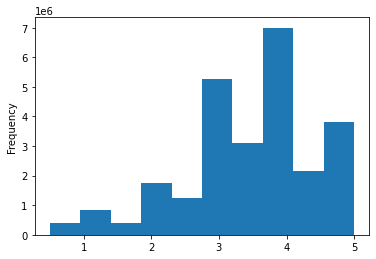

In [131]:
# Confirm reasonable data with a histogram and describe() method
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()
# Output is reasonable